# Analysis and Prediction of Heart Disease
### (ETL process)

## 1. Introduction :

We will examine the Heart Disease UCI dataset.Then, We will construct a model that predicts whether or not the patient has heart disease through the variables in this data set.

    If we look at the risk factors related to heart disease ;
        
           1. Main factors that cannot be changed :
                Age
                Gender
                Heredity (thal)
                
           2. Main factors that can be changed :
                Smoking
                High cholesterol
                Hypertension
                Physical inactivity
                Overweight
                Diabetes
                
           3. Other factors such as stress, alcohol, and diet-nutrition.
            
            
     We will perform ML algorithms such as ;
         
            Logistic Regression,
            K-Nearest Neighbour (KNN) Classification, 
            Support Vector Machine (SVM) Algorithm,
            Naive Bayes Algorithm,
            Decision Tree Algorithm,
            Random Forest Classification            
  
## 2. Data :

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

Attribute Information: 
 1. age 
 2. sex 
 3. chest pain type (4 values) 
 4. resting blood pressure 
 5. serum cholestoral in mg/dl 
 6. fasting blood sugar > 120 mg/dl
 7. resting electrocardiographic results (values 0,1,2)
 8. maximum heart rate achieved 
 9. exercise induced angina 
 10. oldpeak = ST depression induced by exercise relative to rest 
 11. the slope of the peak exercise ST segment 
 12. number of major vessels (0-3) colored by flourosopy 
 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


### 2.1. Data Collection :

In [51]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import numpy as np
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt

%matplotlib inline


def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_0dc47b3a85024faf8c9e361e756597e5 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='iN3J17eRe8Mezyc57J4mtxTRFl-oey7Re0eCAwWgP_8T',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_0dc47b3a85024faf8c9e361e756597e5.get_object(Bucket='definition-donotdelete-pr-cluwtgruaxvlbz',Key='heart.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Let's check the size of this dataset.

In [3]:
df.shape

(303, 14)

### Features and Target variable :

 1. age: The person's age in years
 2. sex: The person's sex (1 = male, 0 = female)
 3. cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
 4. trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
 5. chol: The person's cholesterol measurement in mg/dl
 6. fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
 7. restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2showing   probable or definite left ventricular hypertrophy by Estes' criteria)
 8. thalach: The person's maximum heart rate achieved
 9. exang: Exercise induced angina (1 = yes; 0 = no)
 10. oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
 11. slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
 12. ca: The number of major vessels (0-3)
 13. thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
 14. target: Heart disease (0 = no, 1 = yes)
 
Dataset has information about 303 people. There are 13 features which are made available and there is one target variable.

## 2.2. Exploratory Data Analysis :

Let's explore the data further to understand the features made available to us, identify any potential data quality issues and identify the columns that we will be using for creating ML model which will help predict heart disease.

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df.count(axis=0)

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
target      303
dtype: int64

In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Let's check null values in our data set.

In [8]:
print('Sum of Null Values :')
df.isnull().sum()

Sum of Null Values :


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

As you see , there are not null values in our data set

### Patience with and without heart disease :

In [11]:
y = df["target"]

/opt/ibm/conda/miniconda3/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


1    165
0    138
Name: target, dtype: int64


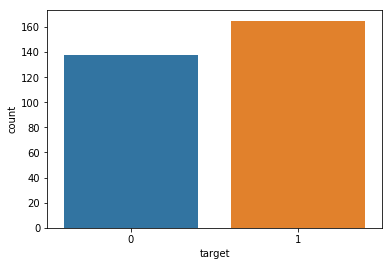

In [12]:
ax = sns.countplot(df["target"])
target_temp = df.target.value_counts()
print(target_temp)

In [13]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


### Disease Probability Bar Plot :

/opt/ibm/conda/miniconda3/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


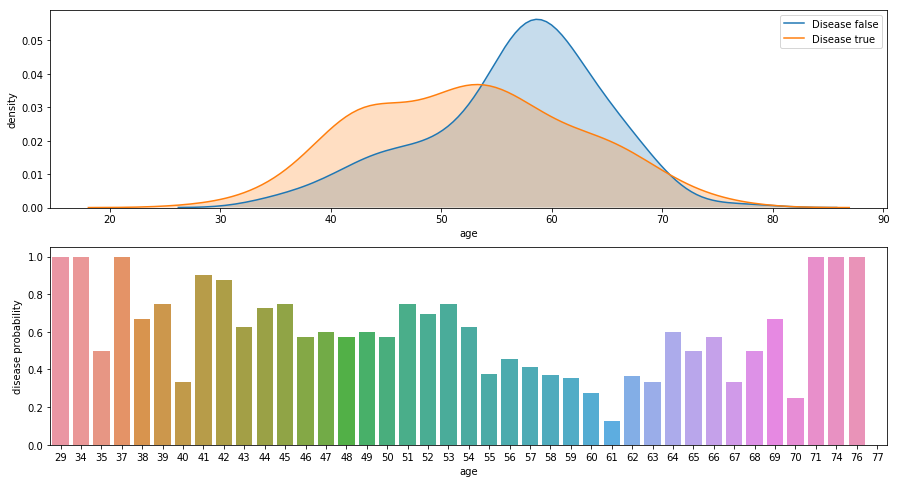

In [14]:
def plotAge():
    facet_grid = sns.FacetGrid(df, hue='target')
    facet_grid.map(sns.kdeplot, "age", shade=True, ax=axes[0])
    legend_labels = ['Disease false', 'Disease true']
    for t, l in zip(axes[0].get_legend().texts, legend_labels):
        t.set_text(l)
        axes[0].set(xlabel='age', ylabel='density')

    avg = df[["age", "target"]].groupby(['age'], as_index=False).mean()
    sns.barplot(x='age', y='target', data=avg, ax=axes[1])
    axes[1].set(xlabel='age', ylabel='disease probability')

    plt.clf()

fig_age, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 8))
plotAge()


### Age Analysis :

In [15]:
#data age show value counts for age at least 10
df.age.value_counts()[:10]

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
Name: age, dtype: int64

/opt/ibm/conda/miniconda3/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


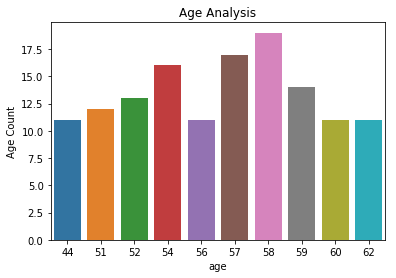

In [16]:
sns.barplot(x=df.age.value_counts()[:10].index,y=df.age.value_counts()[:10].values)
plt.xlabel('age')
plt.ylabel('Age Count')
plt.title('Age Analysis')
plt.show()

We can categorize elderly,middle-aged, young people by looking at the age ranges.

In [17]:
#firstly find min and max ages
minAge=min(df.age)
maxAge=max(df.age)
meanAge=df.age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.366336633663366


In [18]:
young_ages=df[(df.age>=29)&(df.age<40)]
middle_ages=df[(df.age>=40)&(df.age<55)]
elderly_ages=df[(df.age>55)]
print('Young Ages :',len(young_ages))
print('Middle Ages :',len(middle_ages))
print('Elderly Ages :',len(elderly_ages))

Young Ages : 16
Middle Ages : 128
Elderly Ages : 151


/opt/ibm/conda/miniconda3/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


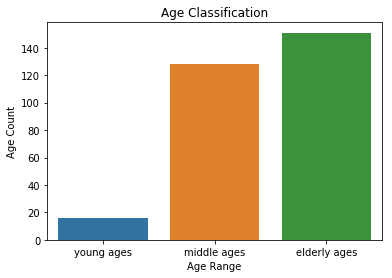

In [19]:
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(young_ages),len(middle_ages),len(elderly_ages)])
plt.xlabel('Age Range')
plt.ylabel('Age Count')
plt.title('Age Classification')
plt.show()

### Sex/Gender Analysis :

In [20]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [21]:
total_genders_count=len(df.sex)
male_count=len(df[df['sex']==1])
female_count=len(df[df['sex']==0])
print('Total Genders :',total_genders_count)
print('Male Count    :',male_count)
print('Female Count  :',female_count)

Total Genders : 303
Male Count    : 207
Female Count  : 96


In [22]:
#Percentage ratios
print("Male State: {:.2f}%".format((male_count / (total_genders_count)*100)))
print("Female State: {:.2f}%".format((female_count / (total_genders_count)*100)))

Male State: 68.32%
Female State: 31.68%


/opt/ibm/conda/miniconda3/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


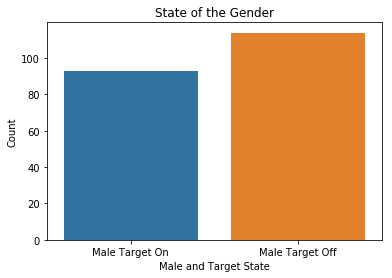

In [23]:
#Male State & target 1 & 0
male_andtarget_on=len(df[(df.sex==1)&(df['target']==1)])
male_andtarget_off=len(df[(df.sex==1)&(df['target']==0)])
####
sns.barplot(x=['Male Target On','Male Target Off'],y=[male_andtarget_on,male_andtarget_off])
plt.xlabel('Male and Target State')
plt.ylabel('Count')
plt.title('State of the Gender')
plt.show()

/opt/ibm/conda/miniconda3/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


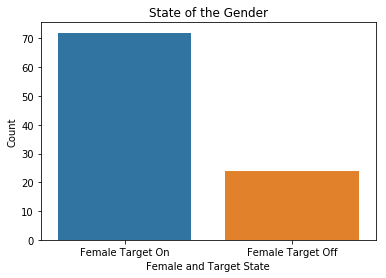

In [24]:
#Female State & target 1 & 0
female_andtarget_on=len(df[(df.sex==0)&(df['target']==1)])
female_andtarget_off=len(df[(df.sex==0)&(df['target']==0)])
####
sns.barplot(x=['Female Target On','Female Target Off'],y=[female_andtarget_on,female_andtarget_off])
plt.xlabel('Female and Target State')
plt.ylabel('Count')
plt.title('State of the Gender')
plt.show()

### Chest Pain Type Analysis :

A wide range of chest pain is present in cases of heart failure. These pains will be analyzed according to their problems and age ranges.

In [25]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

/opt/ibm/conda/miniconda3/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


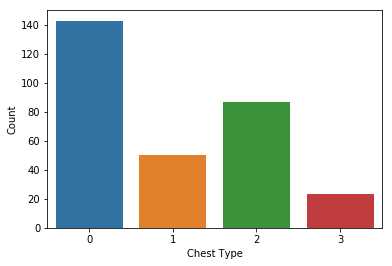

In [26]:
#0 status at least
#1 condition slightly distressed
#2 condition medium problem
#3 condition too bad

sns.countplot(df.cp)
plt.xlabel('Chest Type')
plt.ylabel('Count')
plt.show()

### Visualize the data as histograms :

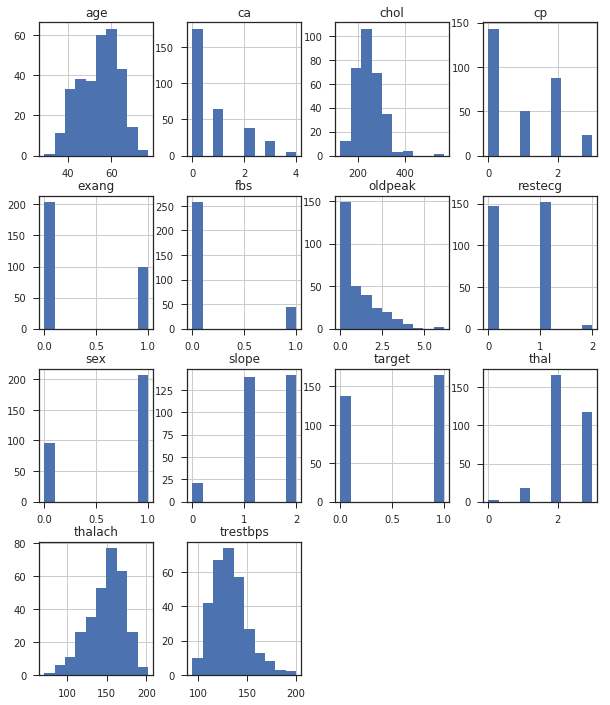

In [56]:
df.hist(figsize=(10,12));

### Correlation between columns :

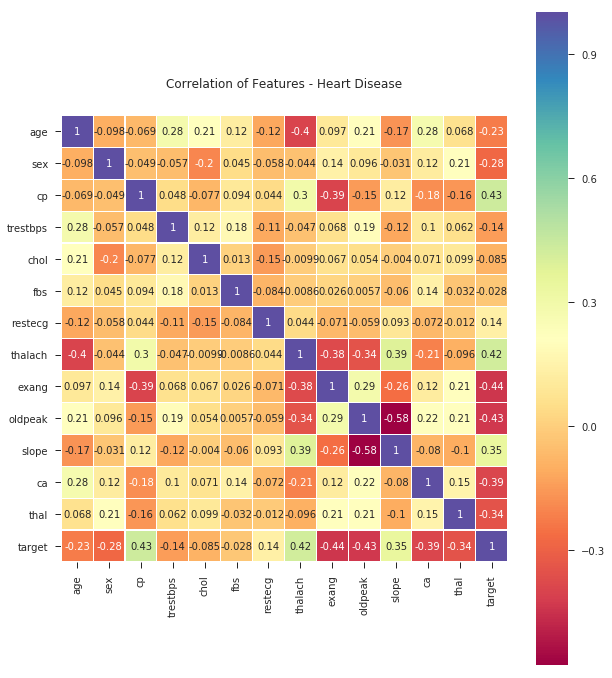

In [49]:
corr = df.corr()

f, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap='Spectral', square=True, ax=ax, annot=True, linewidth=0.1)
plt.title('Correlation of Features - Heart Disease', y=1.05, size=12);

Slope and oldpeak have strongest inverse correlation, thalach and target have the strongest correlation but, the data set is not strongly correlated.

### Transform columns into Categorical Variables :

Categorical variables in our data set must be converted before ML processing.We must determine which variables are categorical and scale types.

In [53]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


sex, cp, fbs, testecg, exang, slope, ca ve thal variables are categorical.Now let's look at the values of these variables with .unique() method.

In [54]:
print("""
Sex unique variables : {}
Cp unique variables : {}
Fbs unique variables : {}
Restecg unique variables : {}
Exang unique variables : {}
Slope unique variables : {}
Ca unique variables : {}
Thal unique variables : {}
""".format(df.sex.unique(),
           df.cp.unique(),
           df.fbs.unique(),
           df.restecg.unique(),
           df.exang.unique(),
           df.slope.unique(),
           df.ca.unique(),
           df.thal.unique()))


Sex unique variables : [1 0]
Cp unique variables : [3 2 1 0]
Fbs unique variables : [1 0]
Restecg unique variables : [0 1 2]
Exang unique variables : [0 1]
Slope unique variables : [0 2 1]
Ca unique variables : [0 2 1 3 4]
Thal unique variables : [1 2 3 0]



As a result , we will perform OneHotEncoder on the Feature Creation notebook.

### 2.3. Store Data in IBM Object Store :

Let's set the credentials and connect to the IBM Data store for persisting our data.

In [56]:
import ibmos2spark
# @hidden_cell
credentials = {
    'endpoint': 'https://s3.eu-geo.objectstorage.service.networklayer.com',
    'service_id': 'iam-ServiceId-39b8034e-49e4-4e3e-b6fd-44f01e7f35b9',
    'iam_service_endpoint': 'https://iam.eu-gb.bluemix.net/oidc/token',
    'api_key': 'iN3J17eRe8Mezyc57J4mtxTRFl-oey7Re0eCAwWgP_8T'
}

configuration_name = 'os_0dc47b3a85024faf8c9e361e756597e5_configs'
cos = ibmos2spark.CloudObjectStorage(sc, credentials, configuration_name, 'bluemix_cos')

from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
sparkDF = sqlContext.createDataFrame(df)
sparkDF = sparkDF.repartition(1)
sparkDF.write.parquet(cos.url('heart.parquet', 'definition-donotdelete-pr-cluwtgruaxvlbz'))

The data has been persisted in the IBM Object store, let's check and confirm the data set

In [57]:
df_persisted_data = spark.read.parquet(cos.url('heart.parquet', 'definition-donotdelete-pr-cluwtgruaxvlbz'))
df_persisted_data.show()

+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|target|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
| 63|  1|  3|     145| 233|  1|      0|    150|    0|    2.3|    0|  0|   1|     1|
| 37|  1|  2|     130| 250|  0|      1|    187|    0|    3.5|    0|  0|   2|     1|
| 41|  0|  1|     130| 204|  0|      0|    172|    0|    1.4|    2|  0|   2|     1|
| 56|  1|  1|     120| 236|  0|      1|    178|    0|    0.8|    2|  0|   2|     1|
| 57|  0|  0|     120| 354|  0|      1|    163|    1|    0.6|    2|  0|   2|     1|
| 57|  1|  0|     140| 192|  0|      1|    148|    0|    0.4|    1|  0|   1|     1|
| 56|  0|  1|     140| 294|  0|      0|    153|    0|    1.3|    1|  0|   2|     1|
| 44|  1|  1|     120| 263|  0|      1|    173|    0|    0.0|    2|  0|   3|     1|
| 52|  1|  2|     172| 199|  1|      1|    162|    0|    0.5|    2|  0|   3|